# <center> Pipelines, Serialization </center> 

<p style="align: center;"><img align=center src="./images/Industrial-Pipeline-Cleaning.jpg"  width=1000></p>

.

.

<p style="align: center;"><img align=center src="https://hazelcast.com/wp-content/uploads/2019/11/24_DataPipleline-1.png"  width=1000></p>

In [1]:
import pandas as pd
import numpy as np

# Пара библиотек для визуализации
import matplotlib.pyplot as plt
%matplotlib inline


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore")

# Импорт Данных

In [2]:
file_path = 'https://raw.githubusercontent.com/a-milenkin/Datasetes_for_Piplines/main/responses.csv'
data = pd.read_csv(file_path)

In [3]:
data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


<div class="alert alert-info">

<b>Про датасет </b>


    
Приведеные результаты опроса молодежи до 21-го года по тому, какие вещи делют их счастливыми по 5-й шкале
    
</div>


<div class="alert alert-info">

<b>Про Задачу </b>

Попробуем классифицировать людей по оценкам уровня счастья
    
</div>


In [4]:
interesting_features = ["Happiness in life", "Age", "Height", "Gender", "Weight", 
              "Left - right handed", "Village - town", "Getting up", "God",
              "Health", "Borrowed stuff", "Self-criticism", "Elections", 
              "Smoking", "Alcohol" ,"Number of friends", "Spending on healthy eating",
              "Music", "Movies", "Friends versus money", "Changing the past"]

target = ["Happiness in life"]

In [672]:
# data["Happiness in life"].hist();

In [5]:
data = data[interesting_features]

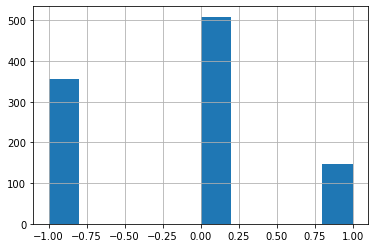

In [6]:
# Сбалансируем немного классы

def happiness_score(x):
    if x < 4:
        return -1
    elif x == 4.0:
        return 0
    else:
        return 1
    
data["Happiness in life"] = data["Happiness in life"].apply(happiness_score)

data["Happiness in life"].hist();

# Как пишут код обычно? - The painful way

<AxesSubplot:>

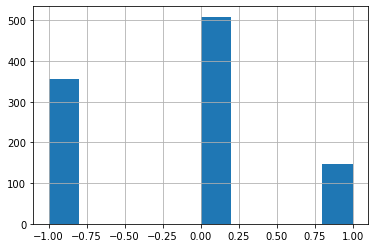

In [7]:
data["Happiness in life"].hist()

# Какой-нибудь EDA (исследование данных)

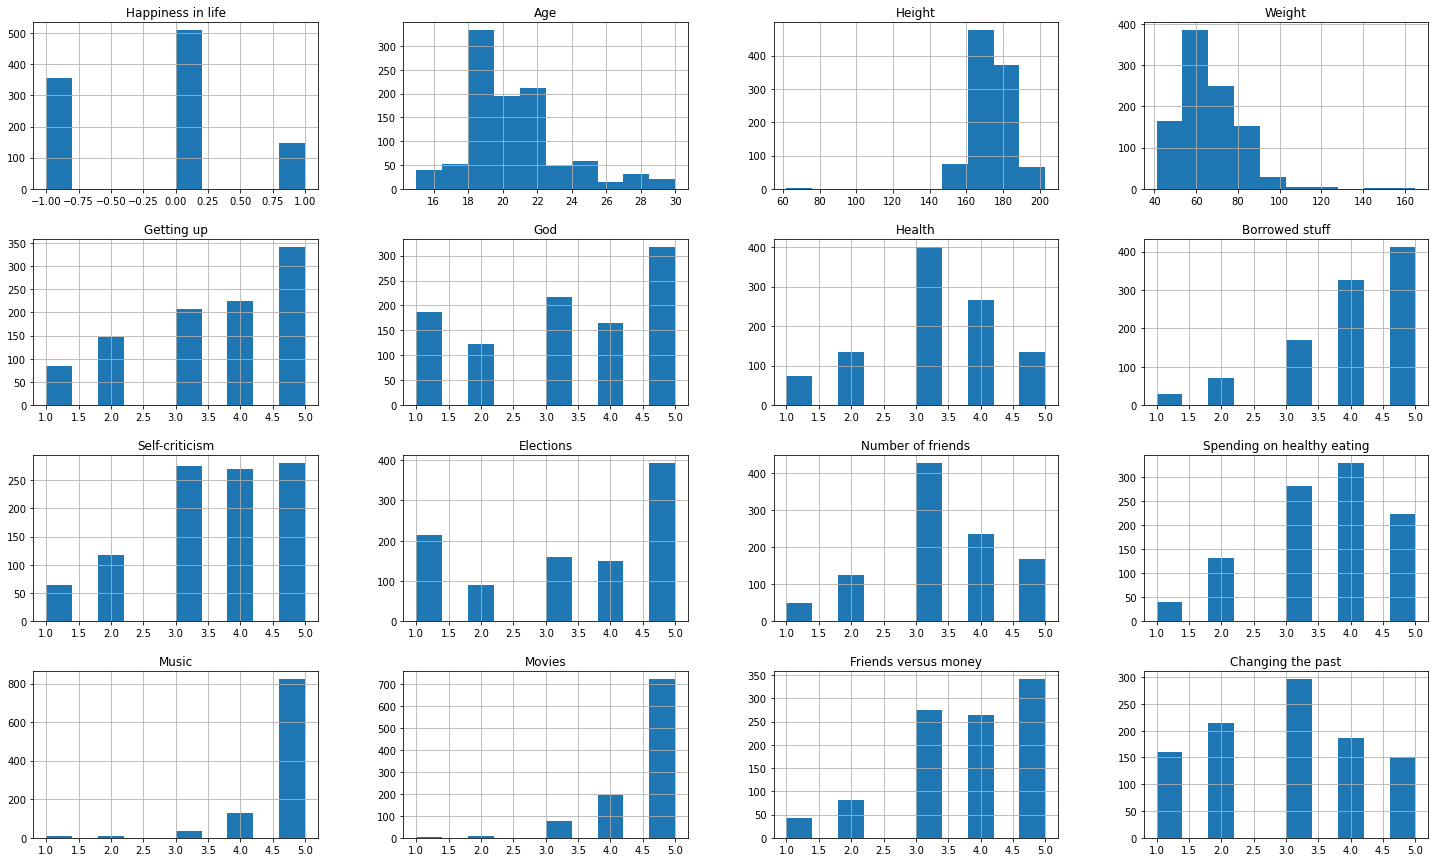

In [8]:
data.hist(figsize=(25, 15))

plt.show()

<AxesSubplot:>

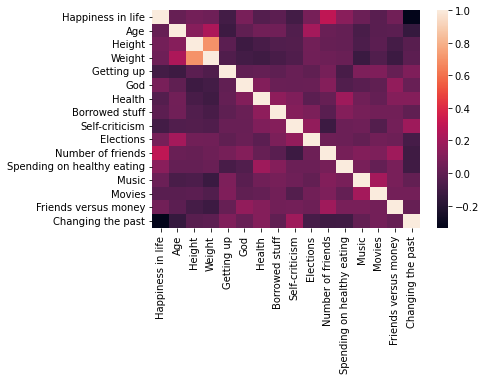

In [9]:
import seaborn as sns

sns.heatmap(data.corr())

# Есть ли в данных выбросы? Есть почти всегда!

In [678]:
# data.isnull().sum()

In [679]:
# data.dropna(inplace=True)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


data_train, data_test = train_test_split(data.copy(), test_size=0.2, stratify=data[target])

data_train.dropna(inplace=True)
data_test.dropna(inplace=True)

print(data_train.shape, data_test.shape)

(751, 21) (174, 21)


In [11]:
data.head()

,Happiness in life,Age,Height,Gender,Weight,Left - right handed,Village - town,Getting up,God,Health,...,Self-criticism,Elections,Smoking,Alcohol,Number of friends,Spending on healthy eating,Music,Movies,Friends versus money,Changing the past
0,0,20.0,163.0,female,48.0,right handed,village,2.0,1.0,1.0,...,1.0,4.0,never smoked,drink a lot,3,3.0,5.0,5.0,3.0,1.0
1,0,19.0,163.0,female,58.0,right handed,city,5.0,1.0,4.0,...,4.0,5.0,never smoked,drink a lot,3,2.0,4.0,5.0,4.0,4.0
2,0,20.0,176.0,female,67.0,right handed,city,4.0,5.0,2.0,...,4.0,5.0,tried smoking,drink a lot,3,2.0,5.0,5.0,5.0,5.0
3,-1,22.0,172.0,female,59.0,right handed,city,1.0,4.0,1.0,...,5.0,5.0,former smoker,drink a lot,1,1.0,5.0,5.0,2.0,5.0
4,-1,20.0,170.0,female,59.0,right handed,village,4.0,5.0,3.0,...,5.0,5.0,tried smoking,social drinker,3,4.0,5.0,5.0,3.0,4.0


In [12]:
data['Alcohol'].value_counts()

social drinker    659
drink a lot       222
never             124
Name: Alcohol, dtype: int64

# Какие признаки в данных?

In [13]:
numerical_features = ['Age', 'Height', 'Weight']  # Численные переменные

# Бинарные признаки
to_dummies = [
    'Gender', 'Left - right handed', 'Village - town', 'Smoking',  "Alcohol" ,
]

# Категориальные признаки
categorical_features = [
    col for col in data.columns if col not in numerical_features + target + to_dummies
]

all_features = categorical_features + numerical_features
len(all_features)

15

In [684]:
# data[numerical_features]

In [14]:
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, MinMaxScaler

In [15]:
scaler = StandardScaler() # Нормировка для численных признаков

In [16]:
data_train_scaled = scaler.fit_transform(data_train[numerical_features])
data_train_scaled[:10]

array([[ 0.17586232,  0.11580232,  0.23727749],
       [ 0.17586232,  0.53848783,  0.52632111],
       [ 0.17586232,  1.17251609, -0.12402704],
       [ 0.17586232,  1.06684471,  1.10440835],
       [-1.22173132, -0.83524007, -0.918897  ],
       [ 0.17586232,  1.38385884,  0.4540602 ],
       [-1.22173132, -0.41255456, -0.48533157],
       [-0.87233291,  0.64415921,  0.59858201],
       [ 0.87465913, -0.94091145, -1.56924515],
       [ 1.92285436,  1.91221573,  1.68249559]])

In [17]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')  # кодирование для категориальных признаков

data_train_ohe = ohe.fit_transform(data_train[to_dummies])
data_train_ohe[:10]

array([[0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.]])

In [18]:
data_train_tramsformed = pd.concat([pd.DataFrame(data_train_scaled, columns=numerical_features),
                                    pd.DataFrame(data_train_ohe, columns=ohe.get_feature_names()),
                                   # pd.DataFrame(data_train[categorical_features].values)
                                   ], axis=1)
data_train_tramsformed.head()

,Age,Height,Weight,x0_female,x0_male,x1_left handed,x1_right handed,x2_city,x2_village,x3_current smoker,x3_former smoker,x3_never smoked,x3_tried smoking,x4_drink a lot,x4_never,x4_social drinker
0,0.175862,0.115802,0.237277,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.175862,0.538488,0.526321,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.175862,1.172516,-0.124027,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.175862,1.066845,1.104408,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-1.221731,-0.835240,-0.918897,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# ML часть

In [19]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer

In [20]:
model = LogisticRegression()

model.fit(data_train_tramsformed, data_train[target])

LogisticRegression()

In [21]:
preds = model.predict(data_train_tramsformed)


print(classification_report(data_train[target], preds))

              precision    recall  f1-score   support

          -1       0.47      0.08      0.14       262
           0       0.51      0.96      0.67       379
           1       0.00      0.00      0.00       110

    accuracy                           0.51       751
   macro avg       0.33      0.35      0.27       751
weighted avg       0.42      0.51      0.39       751



# А как же тест?! Валидация

In [22]:
data_test_scaled = scaler.transform(data_test[numerical_features])
data_test_scaled[:10]

array([[ 1.22405754,  0.11580232,  0.30953839],
       [ 0.17586232,  0.11580232,  0.59858201],
       [-1.92052814, -0.09554043, -1.28020153],
       [ 3.320448  , -0.09554043,  0.3817993 ],
       [ 0.52526072, -0.94091145, -1.06341881],
       [-0.17353609,  0.11580232, -0.9911579 ],
       [-0.5229345 , -1.1522542 , -1.13567971],
       [-0.5229345 , -1.68061109, -1.42472334],
       [ 0.87465913, -0.41255456,  0.23727749],
       [-0.5229345 , -0.41255456, -0.918897  ]])

In [23]:
data_test_ohe = ohe.transform(data_test[to_dummies])
data_test_ohe[:10]

array([[0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.],
       [1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.]])

In [24]:
data_test_tramsformed = pd.concat([pd.DataFrame(data_test_scaled, columns=numerical_features),
                                    pd.DataFrame(data_test_ohe, columns=ohe.get_feature_names()),
                                    #pd.DataFrame(data_test[categorical_features].values)
                                  ], axis=1)
data_test_tramsformed.head()

,Age,Height,Weight,x0_female,x0_male,x1_left handed,x1_right handed,x2_city,x2_village,x3_current smoker,x3_former smoker,x3_never smoked,x3_tried smoking,x4_drink a lot,x4_never,x4_social drinker
0,1.224058,0.115802,0.309538,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.175862,0.115802,0.598582,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-1.920528,-0.095540,-1.280202,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,3.320448,-0.095540,0.381799,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.525261,-0.940911,-1.063419,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [25]:
preds = model.predict(data_test_tramsformed)

In [26]:
print(classification_report(data_test[target], preds))

              precision    recall  f1-score   support

          -1       0.29      0.06      0.11        62
           0       0.51      0.92      0.65        88
           1       0.00      0.00      0.00        24

    accuracy                           0.49       174
   macro avg       0.26      0.33      0.25       174
weighted avg       0.36      0.49      0.37       174



## Что не так с этим способом?

<div class="alert alert-warning">


 - Дублируем код ли кода

 - Сложно маштабировать

 - Сложно поддерживать свой код
    
 - Много времени(

Как сохранить всю эту махину? 

# Как пишут код true-датасаентисты - The pipeline way 

<div>
<img src="https://i.pinimg.com/564x/41/d2/4b/41d24b25710d7746b22a7eb34316952c.jpg" width="500"/>
</div>

<div class="alert alert-info">

Pipeline позволяет обернуть сразу несколько этапов обработки данных в один объект

- **FunctionTransformer**: преобразует функцию в трансформер
- **FeatureUnion**: объединяет результаты нескольких трансформеров в один датасет
- **ColumnTransformer**: выбирает определенные колонки
- **make_pipeline**: удобная обертка для создания пайплайна, можно использовать вместо Pipeline 

In [27]:
# Гости этого вечера. Нужные нам фрагменты для сборки пайплайна

from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [28]:
#   Для категориальных - применяем SimpleImputer, а затем StandardScaler
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    ("fs", SelectKBest(score_func=f_classif, k="all")),
])

#   Для категориальных - применяем SimpleImputer, а затем OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer()),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

# Собираем воедино трансформеры для числовых и категориальных признаков
data_transformer = ColumnTransformer(transformers=[
    ("numerical", numerical_transformer, numerical_features),
    ("categorical", categorical_transformer, categorical_features),
])

# Создание конвейера препроцессора, который сначала преобразует данные
preprocessor = Pipeline(steps=[("data_transformer", data_transformer)])

classifier_pipline = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("classifier", LogisticRegression())])

classifier_pipline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler()),
                                                                                   ('fs',
                                                                                    SelectKBest(k='all'))]),
                                                                   ['Age',
                                                                    'Height',
                                                                    'Weight']),
       

# Добавим магии - отрисовка!

In [29]:
import sklearn
sklearn.set_config(display='diagram') #Подключим визуал

In [30]:
classifier_pipline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler()),
                                                                                   ('fs',
                                                                                    SelectKBest(k='all'))]),
                                                                   ['Age',
                                                                    'Height',
                                                                    'Weight']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['Getting '
                                                                    'up',
                                                                    'God',
                                                                    'Health',
                                                                    'Borrowed '
                                                                    'stuff',
                                                                    'Self-criticism',
                                                                    'Elections',
                                                                    'Number of '
                                                                    'friends',
                                                                    'Spending '
                                                                    'on '
                                                                    'healthy '
                                                                    'eating',
                                                                    'Music',
                                                                    'Movies',
                                                                    'Friends '
                                                                    'versus '
                                                                    'money',
                                                                    'Changing '
                                                                    'the '
                                                                    'past'])]))])),
                ('classifier', LogisticRegression())])

In [31]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data[all_features + target], test_size=0.2, stratify=data[target])
print(data_train.shape, data_test.shape)

(808, 16) (202, 16)


In [36]:
# # data_train.columns
# all_features

In [ ]:
# data_train[all_features]

In [32]:

classifier_pipline.fit(data_train[all_features], data_train[target])

preds = classifier_pipline.predict(data_test[all_features])

print(classification_report(data_test[target], preds))

              precision    recall  f1-score   support

          -1       0.58      0.52      0.55        71
           0       0.59      0.68      0.63       102
           1       0.43      0.31      0.36        29

    accuracy                           0.57       202
   macro avg       0.53      0.50      0.51       202
weighted avg       0.56      0.57      0.56       202



# А как подбирать параметры у этой всей махины??

In [33]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import f1_score, make_scorer

f1 = make_scorer(f1_score, average="macro")

In [34]:
param_grid = {
    'classifier__C': np.logspace(-5, 2, 200), # np.linspace(-10, 10)
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight': ['balanced', None],
    'preprocessor__data_transformer__numerical__imputer__strategy':['median', 'mean']
}


search = GridSearchCV(classifier_pipline, param_grid, n_jobs=-1, cv=3) #, scoring=f1)

search.fit(data_train.drop(target, axis=1), data_train[target])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('data_transformer',
                                                         ColumnTransformer(transformers=[('numerical',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer()),
                                                                                                          ('scaler',
                                                                                                           StandardScaler()),
                                                                                                          ('fs',
                                                                                                           SelectKBest(k='all'))]),
                                                                                          ['Age',
                                                                                           'Height',
                                                                                           'Weight']),
                                                                                         ('categorical',
                                                                                          Pipeline(steps=[('imputer',
                                                                                                           SimpleImputer()),
                                                                                                          ('onehot',
                                                                                                           OneHotEncod...
       2.96730241e+01, 3.21764175e+01, 3.48910121e+01, 3.78346262e+01,
       4.10265811e+01, 4.44878283e+01, 4.82410870e+01, 5.23109931e+01,
       5.67242607e+01, 6.15098579e+01, 6.66991966e+01, 7.23263390e+01,
       7.84282206e+01, 8.50448934e+01, 9.22197882e+01, 1.00000000e+02]),
                         'classifier__class_weight': ['balanced', None],
                         'classifier__penalty': ['l1', 'l2'],
                         'preprocessor__data_transformer__numerical__imputer__strategy': ['median',
                                                                                          'mean']})

<div class="alert alert-info">

Нам даже не нужно теперь делить на `train` и `test`, ведь есть валидация 

In [35]:
search.best_params_

{'classifier__C': 0.15343684089300133,
 'classifier__class_weight': None,
 'classifier__penalty': 'l2',
 'preprocessor__data_transformer__numerical__imputer__strategy': 'mean'}

In [36]:
search.best_score_

0.5594428381293314

# Еще раз, но по шагам!

In [37]:
classifier_pipline = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('classifier', LogisticRegression())])

In [38]:
# Создание конвейера препроцессора, который сначала преобразует данные.
preprocessor = Pipeline(steps=[("data_transformer", data_transformer)])


# Собираем воедино трансформеры для числовых и категориальных признаков
data_transformer = ColumnTransformer(
    transformers=[
        ("numerical", numerical_transformer, numerical_features),
        ("categorical", categorical_transformer, categorical_features),
    ]
)

In [39]:
#   Для категориальных - применяем SimpleImputer, а затем StandardScaler

numerical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer()),
        ("scaler", StandardScaler()),
        ("fs", SelectKBest(score_func=f_classif, k="all")),
    ]
)

In [40]:
#   Для категориальных - применяем SimpleImputer, а затем OneHotEncoder
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer()),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)


classifier_pipline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler()),
                                                                                   ('fs',
                                                                                    SelectKBest(k='all'))]),
                                                                   ['Age',
                                                                    'Height',
                                                                    'Weight']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['Getting '
                                                                    'up',
                                                                    'God',
                                                                    'Health',
                                                                    'Borrowed '
                                                                    'stuff',
                                                                    'Self-criticism',
                                                                    'Elections',
                                                                    'Number of '
                                                                    'friends',
                                                                    'Spending '
                                                                    'on '
                                                                    'healthy '
                                                                    'eating',
                                                                    'Music',
                                                                    'Movies',
                                                                    'Friends '
                                                                    'versus '
                                                                    'money',
                                                                    'Changing '
                                                                    'the '
                                                                    'past'])]))])),
                ('classifier', LogisticRegression())])

# А если вдруг одной модели мало?

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost

clf1 = LogisticRegression(multi_class="multinomial", random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

blending_classifier = VotingClassifier(
    estimators=[("log_regrassion", clf1), 
                ("random_forest", clf2), 
                ("gnb", clf3)] 
)
blending_classifier

VotingClassifier(estimators=[('log_regrassion',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=1)),
                             ('random_forest',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('gnb', GaussianNB())])

In [42]:
classifier_pipline = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier", blending_classifier)]
)

classifier_pipline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler()),
                                                                                   ('fs',
                                                                                    SelectKBest(k='all'))]),
                                                                   ['Age',
                                                                    'Height',
                                                                    'Weight']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))...
                                                                    'Elections',
                                                                    'Number of '
                                                                    'friends',
                                                                    'Spending '
                                                                    'on '
                                                                    'healthy '
                                                                    'eating',
                                                                    'Music',
                                                                    'Movies',
                                                                    'Friends '
                                                                    'versus '
                                                                    'money',
                                                                    'Changing '
                                                                    'the '
                                                                    'past'])]))])),
                ('classifier',
                 VotingClassifier(estimators=[('log_regrassion',
                                               LogisticRegression(multi_class='multinomial',
                                                                  random_state=1)),
                                              ('random_forest',
                                               RandomForestClassifier(n_estimators=50,
                                                                      random_state=1)),
                                              ('gnb', GaussianNB())]))])

# А что если хотим использовать стекинг?

In [43]:
# Your code here.
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier


In [44]:
# получим список эстиматоров
estimators = [
    ("Random_Forest", RandomForestClassifier()),
    ("Xgboost", xgboost.XGBClassifier()),
    ("SVM", LinearSVC()),
    
]

# построим классификатор используя стекинг и наш список классификаторов
stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(n_jobs=-1, verbose=True),
    n_jobs=-1,
    verbose=True,
)

In [45]:
stacking_classifier

StackingClassifier(estimators=[('Random_Forest', RandomForestClassifier()),
                               ('Xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              enable_categorical=False,
                                              gamma=None, gpu_id=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None,
                                              max_delta_step=None,
                                              max_depth=None,
                                              min...
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None,
                                              reg_alpha=None, reg_lambda=None,
                                              scale_pos_weight=None,
                                              subsample=None, tree_method=None,
                                              validate_parameters=None,
                                              verbosity=None)),
                               ('SVM', LinearSVC())],
                   final_estimator=LogisticRegression(n_jobs=-1, verbose=True),
                   n_jobs=-1, verbose=True)

In [46]:
# получим список эстиматоров
estimators = [
    ("Random_Forest", RandomForestClassifier()),
    ("SVM", LinearSVC()),
    ("Xgboost", xgboost.XGBClassifier()),
]

# построим классификатор используя стекинг и наш список классификаторов
stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression(n_jobs=-1), n_jobs=-1
)

classifier_pipline = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", stacking_classifier)]
)

classifier_pipline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler()),
                                                                                   ('fs',
                                                                                    SelectKBest(k='all'))]),
                                                                   ['Age',
                                                                    'Height',
                                                                    'Weight']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))...
                                                               max_delta_step=None,
                                                               max_depth=None,
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               predictor=None,
                                                               random_state=None,
                                                               reg_alpha=None,
                                                               reg_lambda=None,
                                                               scale_pos_weight=None,
                                                               subsample=None,
                                                               tree_method=None,
                                                               validate_parameters=None,
                                                               verbosity=None))],
                                    final_estimator=LogisticRegression(n_jobs=-1),
                                    n_jobs=-1))])

# Чуть более хитрый стекинг/блендинг моделей

In [47]:
from sklearn.decomposition import PCA

# получим список эстиматоров
estimators = [
    ("SVM", make_pipeline(preprocessor, PCA(), LinearSVC())),
    ("Random_Forest", make_pipeline(preprocessor, RandomForestClassifier())),
    ("Xgboost", make_pipeline(preprocessor, xgboost.XGBClassifier())),
]

# построим классификатор используя стекинг и наш список классификаторов
stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(n_jobs=-1, verbose=True),
    n_jobs=-1,
    verbose=True,
)

stacking_classifier

StackingClassifier(estimators=[('SVM',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('data_transformer',
                                                                  ColumnTransformer(transformers=[('numerical',
                                                                                                   Pipeline(steps=[('imputer',
                                                                                                                    SimpleImputer()),
                                                                                                                   ('scaler',
                                                                                                                    StandardScaler()),
                                                                                                                   ('fs',
                                                                                                                    SelectKBest(k='all'))]),
                                                                                                   ['Age',
                                                                                                    'Height',
                                                                                                    'Weight']),
                                                                                                  ('categorical',
                                                                                                   Pipeline(steps=[('imputer',
                                                                                                                    SimpleImputer()),
                                                                                                                   ('onehot',
                                                                                                                    OneHo...
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               predictor=None,
                                                               random_state=None,
                                                               reg_alpha=None,
                                                               reg_lambda=None,
                                                               scale_pos_weight=None,
                                                               subsample=None,
                                                               tree_method=None,
                                                               validate_parameters=None,
                                                               verbosity=None))]))],
                   final_estimator=LogisticRegression(n_jobs=-1, verbose=True),
                   n_jobs=-1, verbose=True)

# А сколько всего кода было написано?

In [48]:
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    ("feature_selector", SelectKBest(score_func=f_classif, k="all"))])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer()),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

data_transformer = ColumnTransformer(transformers=[
    ("numerical", numerical_transformer, numerical_features),
    ("categorical", categorical_transformer, categorical_features)])

preprocessor = Pipeline(steps=[("data_transformer", data_transformer)])

estimators = [
    ("SVM", make_pipeline(preprocessor, LinearSVC())),
    ("Random_Forest", make_pipeline(preprocessor, RandomForestClassifier(n_jobs=-1))),
    ("xgboost", make_pipeline(preprocessor, xgboost.XGBClassifier(n_jobs=-1)))]

stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(n_jobs=-1, verbose=True),
    n_jobs=-1,
    verbose=True,
)

In [49]:
stacking_classifier

StackingClassifier(estimators=[('SVM',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('data_transformer',
                                                                  ColumnTransformer(transformers=[('numerical',
                                                                                                   Pipeline(steps=[('imputer',
                                                                                                                    SimpleImputer()),
                                                                                                                   ('scaler',
                                                                                                                    StandardScaler()),
                                                                                                                   ('feature_selector',
                                                                                                                    SelectKBest(k='all'))]),
                                                                                                   ['Age',
                                                                                                    'Height',
                                                                                                    'Weight']),
                                                                                                  ('categorical',
                                                                                                   Pipeline(steps=[('imputer',
                                                                                                                    SimpleImputer()),
                                                                                                                   (...
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=-1,
                                                               num_parallel_tree=None,
                                                               predictor=None,
                                                               random_state=None,
                                                               reg_alpha=None,
                                                               reg_lambda=None,
                                                               scale_pos_weight=None,
                                                               subsample=None,
                                                               tree_method=None,
                                                               validate_parameters=None,
                                                               verbosity=None))]))],
                   final_estimator=LogisticRegression(n_jobs=-1, verbose=True),
                   n_jobs=-1, verbose=True)

# Обучении махины - Будет ли легко?

In [50]:
stacking_classifier.fit(data[interesting_features], data[target])


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


StackingClassifier(estimators=[('SVM',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('data_transformer',
                                                                  ColumnTransformer(transformers=[('numerical',
                                                                                                   Pipeline(steps=[('imputer',
                                                                                                                    SimpleImputer()),
                                                                                                                   ('scaler',
                                                                                                                    StandardScaler()),
                                                                                                                   ('feature_selector',
                                                                                                                    SelectKBest(k='all'))]),
                                                                                                   ['Age',
                                                                                                    'Height',
                                                                                                    'Weight']),
                                                                                                  ('categorical',
                                                                                                   Pipeline(steps=[('imputer',
                                                                                                                    SimpleImputer()),
                                                                                                                   (...
                                                               min_child_weight=None,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               n_estimators=100,
                                                               n_jobs=-1,
                                                               num_parallel_tree=None,
                                                               predictor=None,
                                                               random_state=None,
                                                               reg_alpha=None,
                                                               reg_lambda=None,
                                                               scale_pos_weight=None,
                                                               subsample=None,
                                                               tree_method=None,
                                                               validate_parameters=None,
                                                               verbosity=None))]))],
                   final_estimator=LogisticRegression(n_jobs=-1, verbose=True),
                   n_jobs=-1, verbose=True)

In [51]:
preds = stacking_classifier.predict(data[interesting_features])

print(classification_report(data[target], preds))

              precision    recall  f1-score   support

          -1       0.98      0.83      0.90       355
           0       0.89      1.00      0.94       509
           1       1.00      0.96      0.98       146

    accuracy                           0.93      1010
   macro avg       0.96      0.93      0.94      1010
weighted avg       0.94      0.93      0.93      1010



# Гибкость паплайна

In [107]:
# stacking_classifier.estimators[0][1][0].steps[0][1].transformers[0][1].steps[2][1].k

'all'

# Как сохранить всю эту махину?

In [108]:
# Для сериализации моделей
import pickle

In [109]:
with open("owesome_pipeline.pkl", "wb") as f:
    pickle.dump(stacking_classifier, f)

# Импорт модели

In [110]:
with open("owesome_pipeline.pkl", 'rb') as f:
    pipeline_from_saved = pickle.load(f)

In [111]:
pipeline_from_saved.fit(data_train, data_train[target])
preds = pipeline_from_saved.predict(data_test)
print(classification_report(data_test[target], preds))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished


              precision    recall  f1-score   support

          -1       0.58      0.43      0.50        65
           0       0.59      0.83      0.69        93
           1       1.00      0.26      0.41        27

    accuracy                           0.61       185
   macro avg       0.73      0.51      0.53       185
weighted avg       0.65      0.61      0.58       185



# Что дальше?

<div class="alert alert-success">
    
* Признаки бывают разные
* Предобработка бывает сложнее
* Генерация новых признаков

<p style="align: center;"><img align=center src="./images/Industrial-Pipeline-Cleaning.jpg"  width=1000></p>

In [52]:
import pandas as pd
import numpy as np

# Пара библиотек для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import sklearn
sklearn.set_config(display='diagram') # Подключим визуал

import warnings
warnings.filterwarnings("ignore")

# Кастомизированные опции

In [53]:
# Гости этого вечера. Нужные нам фрагменты для сборки пайплайна, они пригодятся нам позже

# from sklearn.pipeline import (
#     _fit_transform_one,
#     _transform_one,
# )

# И уже знакомые нам части 
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

In [54]:
file_path = 'https://raw.githubusercontent.com/a-milenkin/Datasetes_for_Piplines/main/responses.csv'
data = pd.read_csv(file_path)
data.head(3)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats


<div class="alert alert-info">

<b>Про датасет </b>


    
Приведеные результаты опроса молодежи до 21-го года по тому, какие вещи делют их счастливыми по 5-й шкале
    
</div>


<div class="alert alert-info">

<b>Про Задачу </b>

Попробуем классифицировать людей по оценкам уровня счастья
    
</div>


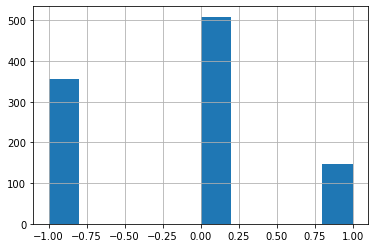

In [55]:
# Сбалансируем немного классы

def happiness_score(x):
    if x < 4:
        return -1
    elif x == 4.0:
        return 0
    else:
        return 1
    
data["Happiness in life"] = data["Happiness in life"].apply(happiness_score)

data["Happiness in life"].hist();

# Классификаций признаков на типы - df.select_dtypes

In [56]:
data.select_dtypes(exclude = ['int', 'float']).info()  # include

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Smoking                 1002 non-null   object
 1   Alcohol                 1005 non-null   object
 2   Punctuality             1008 non-null   object
 3   Lying                   1008 non-null   object
 4   Internet usage          1010 non-null   object
 5   Gender                  1004 non-null   object
 6   Left - right handed     1007 non-null   object
 7   Education               1009 non-null   object
 8   Only child              1008 non-null   object
 9   Village - town          1006 non-null   object
 10  House - block of flats  1006 non-null   object
dtypes: object(11)
memory usage: 86.9+ KB


In [57]:
numerical_features = data.select_dtypes(include=["int", "float"]).columns.to_list()

data[numerical_features].head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,3.0,3.0,4.0,4,1.0,22.0,172.0,59.0,1.0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,4.0,3.0,3.0,2,4.0,20.0,170.0,59.0,1.0


In [58]:
data.select_dtypes(exclude=["int", "float"]).head()

,Smoking,Alcohol,Punctuality,Lying,Internet usage,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,never smoked,drink a lot,i am always on time,never,few hours a day,female,right handed,college/bachelor degree,no,village,block of flats
1,never smoked,drink a lot,i am often early,sometimes,few hours a day,female,right handed,college/bachelor degree,no,city,block of flats
2,tried smoking,drink a lot,i am often running late,sometimes,few hours a day,female,right handed,secondary school,no,city,block of flats
3,former smoker,drink a lot,i am often early,only to avoid hurting someone,most of the day,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,tried smoking,social drinker,i am always on time,everytime it suits me,few hours a day,female,right handed,secondary school,no,village,house/bungalow


In [59]:
# бинарным не надо делать one-hot encoding, они уже бинарные
binary_features = []
category_features  = []

# создаём списки бинарных и категориальных признаков
for col in data.select_dtypes(exclude = ['int', 'float']).columns:
    # если кол-во значений 2 - то это бинарный, иначе категориальный
    if data.dropna()[col].nunique() == 2:
        binary_features.append(col)
    else:
        category_features.append(col)

In [60]:
data[category_features].head(3)

,Smoking,Alcohol,Punctuality,Lying,Internet usage,Education
0,never smoked,drink a lot,i am always on time,never,few hours a day,college/bachelor degree
1,never smoked,drink a lot,i am often early,sometimes,few hours a day,college/bachelor degree
2,tried smoking,drink a lot,i am often running late,sometimes,few hours a day,secondary school


In [61]:
data[binary_features].head(3)

,Gender,Left - right handed,Only child,Village - town,House - block of flats
0,female,right handed,no,village,block of flats
1,female,right handed,no,city,block of flats
2,female,right handed,no,city,block of flats


# Все,теперь у нас три типа признаков

In [62]:
interesting_features = numerical_features + category_features + binary_features

target = ["Happiness in life"]

data = data[interesting_features]

In [63]:
data.head(3)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Alcohol,Punctuality,Lying,Internet usage,Education,Gender,Left - right handed,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,drink a lot,i am always on time,never,few hours a day,college/bachelor degree,female,right handed,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,drink a lot,i am often early,sometimes,few hours a day,college/bachelor degree,female,right handed,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,drink a lot,i am often running late,sometimes,few hours a day,secondary school,female,right handed,no,city,block of flats


# Numerical features

In [64]:
data[numerical_features].head(2)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0


Если мы хотим сделать свои функции для работы с данными, мы можем воспользоваться `FunctionTransformer`, который превращает любую функцию в трансформер т.е. добавляет ей методы `fit`, `transform` и `fit_transform`.

In [65]:
from sklearn.preprocessing import FunctionTransformer

In [68]:
# селектор который будет отбирать все численные признаки
# Тот же способ через функцию
def numerical_select(data):
    return data[numerical_features]

# Превращаем функцию в трансформер
numerical_selector = FunctionTransformer(numerical_select, validate=False)

numerical_selector.fit_transform(data).head(3)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0


In [77]:
# Тот же способ через функцию
def numerical_select(data):
    # генерируем столбец с рандомными значениями как пример feature engineering
    data['random_values'] = np.random.normal(size = len(data))
    
    return data[numerical_features + ['random_values']]

# Превращаем функцию в трансформер
numerical_selector = FunctionTransformer(numerical_select, validate=False)

numerical_selector.fit_transform(data).head(3)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,random_values
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,-0.169756
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,-1.251600
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,0.174690


In [262]:
# Тот же способ через лямбда-функцию
# numerical_selector = FunctionTransformer(lambda data: data[numerical_features], validate=False)

In [69]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

scaler = StandardScaler()

In [78]:
numerical_preprocessor = Pipeline([("numerical_selector", numerical_selector),
                                   ("scaling", scaler)])

In [71]:
numerical_preprocessor.fit_transform(data) 
# Куда-то пропали столцы, надо исправлять!!!

array([[ 0.40397078, -0.39396081, -0.95156664, ..., -1.04937407,
        -1.33055906, -0.29403239],
       [-1.10269062,  0.80577482, -0.95156664, ..., -1.04937407,
        -0.60762757,  0.69328707],
       [ 0.40397078,  2.00551046, -0.95156664, ...,  0.24810353,
         0.04301077,  0.69328707],
       ...,
       [-1.10269062, -0.39396081, -1.80627739, ..., -0.05131438,
         0.62135597, -1.28135184],
       [ 0.40397078, -0.39396081, -0.09685589, ..., -0.05131438,
        -0.60762757, -0.29403239],
       [ 0.40397078,  2.00551046,  0.75785486, ...,  1.14635725,
         0.40447652, -0.29403239]])

In [72]:
# Pipeline в отличии от make_pipline дает возможность обращася к объекту пайплайна по названию
numerical_preprocessor.named_steps['scaling'] #

StandardScaler()

Чтобы это исправить, напишем кастомный скейлер

In [73]:
class StandardScalerDf(StandardScaler):
    """
    DataFrame Wrapper around StandardScaler
    http://flennerhag.com/2017-01-08-Recursive-Override/
    """
    def __init__(self, copy=True, with_mean=True, with_std=True):
        super(StandardScalerDf, self).__init__(copy=copy,
                                               with_mean=with_mean,
                                               with_std=with_std)
        self.feature_names = None

    def transform(self, X, y=None):
        self.feature_names = X.columns
        
        z = super(StandardScalerDf, self).transform(X.values)
        
        # оборачиваем результат в датафрейм и подаём имена признаков, которые были на входе
        return pd.DataFrame(z, index=X.index, columns=self.feature_names)
    
    def get_feature_names(self):
        return self.feature_names

In [74]:
scaler_df = StandardScalerDf()

In [75]:
numerical_preprocessor = Pipeline([
    ("numerical_selector", numerical_selector),
    ("scaling", scaler_df)
])

In [76]:
numerical_preprocessor.fit_transform(data).head(3) # Сохраняются названия столцов. Лушче, но можно сделать меньше кода

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
0,0.403971,-0.393961,-0.951567,-1.131952,-0.114711,-0.763717,-1.398094,1.316567,1.04541,-0.992099,...,0.579151,1.493027,-0.169637,-0.088196,-1.456239,-0.510004,-0.153390,-1.049374,-1.330559,-0.294032
1,-1.102691,0.805775,-0.951567,-1.131952,-1.044424,-1.562473,-0.604581,-0.406348,1.04541,1.193992,...,0.579151,-1.570528,0.671861,-0.918230,1.658216,-1.424743,-0.507068,-1.049374,-0.607628,0.693287
2,0.403971,2.005510,-0.951567,-0.253487,0.815003,0.833797,1.775957,-0.406348,1.04541,0.465295,...,0.579151,-1.570528,0.671861,-0.088196,0.879602,-1.424743,-0.153390,0.248104,0.043011,0.693287


In [79]:
numerical_preprocessor

Pipeline(steps=[('numerical_selector',
                 FunctionTransformer(func=<function numerical_select at 0x000001E945940790>)),
                ('scaling', StandardScaler())])

In [80]:
numerical_preprocessor.named_steps['numerical_selector']

FunctionTransformer(func=<function numerical_select at 0x000001E945940790>)

# Бинарные признаки

In [81]:
# Способ через функцию 
def binary_select(data):
    # для демонстрации добавляем булевый признак
    data['random_binar'] = data['Gender'] == 'female'
    
    return data[binary_features + ['random_binar']] 

# Превращаем функцию в трансформер
binary_selector = FunctionTransformer(binary_select, validate=False)  


# Применяем к данным
binary_selector.fit_transform(data).head()

,Gender,Left - right handed,Only child,Village - town,House - block of flats,random_binar
0,female,right handed,no,village,block of flats,True
1,female,right handed,no,city,block of flats,True
2,female,right handed,no,city,block of flats,True
3,female,right handed,yes,city,house/bungalow,True
4,female,right handed,no,village,house/bungalow,True


In [82]:
# Тот же самый пособ, но через лябма-функцию / короткий способ
binary_selector = FunctionTransformer(lambda data: data[binary_features], validate=False)

In [83]:
# pd.get_dummies(data, columns=to_dummies)

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [84]:
binary_preprocessor = Pipeline([
    ("binary_selector", binary_selector),
    ("ohe", ohe)
])

OneHotEncoder не возвращает датафрейм, пишем кастомный

In [85]:
class OneHotEncodingDf(OneHotEncoder):
    """DataFrame Wrapper around OneHotEncoding"""
    def __init__(self, drop=None, sparse=False, handle_unknown='ignore'):
        super(OneHotEncodingDf, self).__init__(drop=drop,
                                               sparse=sparse,
                                               handle_unknown=handle_unknown
                                              )

    def transform(self, X, y=None):
        z = super(OneHotEncodingDf, self).transform(X.values)
        return pd.DataFrame(z, index=X.index, columns=self.get_feature_names())

In [86]:
ohe_df = OneHotEncodingDf()

In [88]:
binary_preprocessor = Pipeline([
    ("binary_selector", binary_selector),
    ("ohe", ohe_df)
])

In [89]:
binary_preprocessor.fit_transform(data).head()

,x0_female,x0_male,x0_nan,x1_left handed,x1_right handed,x1_nan,x2_no,x2_yes,x2_nan,x3_city,x3_village,x3_nan,x4_block of flats,x4_house/bungalow,x4_nan
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Категориальные переменные

In [90]:
def categorical_select(data):
    return data[categorical_features]

categorical_selector = FunctionTransformer(categorical_select, validate=False)


# categorical_selector = FunctionTransformer(lambda data: data[categorical_features], validate=False)

In [91]:
categorical_preprocessor = Pipeline([
    ("categorical_selector", categorical_selector),
    ("ohe", OneHotEncodingDf())
])

# categorical_selector.fit_transform(data).head()

# Feature Union - собираем все в один датасет

Т.е. сливаем 3 обработчика данных в единый датасет.

In [92]:
feature_union = FeatureUnion([
    ("numerical_preprocessor", numerical_preprocessor),
    ("binary_preprocessor", binary_preprocessor),
    ("categorical_preprocessor", categorical_preprocessor)
])

In [93]:
feature_union

FeatureUnion(transformer_list=[('numerical_preprocessor',
                                Pipeline(steps=[('numerical_selector',
                                                 FunctionTransformer(func=<function numerical_select at 0x000001E945940790>)),
                                                ('scaling',
                                                 StandardScaler())])),
                               ('binary_preprocessor',
                                Pipeline(steps=[('binary_selector',
                                                 FunctionTransformer(func=<function <lambda> at 0x000001E9458105E0>)),
                                                ('ohe', OneHotEncodingDf())])),
                               ('categorical_preprocessor',
                                Pipeline(steps=[('categorical_selector',
                                                 FunctionTransformer(func=<function categorical_select at 0x000001E945810820>)),
                                                ('ohe', OneHotEncodingDf())]))])

In [94]:
feature_union.fit_transform(data)

array([[ 0.40397078, -0.39396081, -0.95156664, ...,  0.        ,
         0.        ,  0.        ],
       [-1.10269062,  0.80577482, -0.95156664, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.40397078,  2.00551046, -0.95156664, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.10269062, -0.39396081, -1.80627739, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.40397078, -0.39396081, -0.09685589, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.40397078,  2.00551046,  0.75785486, ...,  0.        ,
         0.        ,  0.        ]])

In [95]:
feature_union.fit_transform(data).shape

(1010, 226)

In [633]:
# feature_union.named_steps['numerical_preprocessor']

Напишем кастомный FeatureUnion для того, чтобы данные на выходе были так же в виде датафрейма.

In [96]:
from joblib import Parallel, delayed 

# Пара новых гостей
from sklearn.pipeline import (
    _fit_transform_one,
    _transform_one,
)

# https://zablo.net/blog/post/pandas-dataframe-in-scikit-learn-feature-union/

class PandasFeatureUnion(FeatureUnion):
    def fit_transform(self, X, y=None, **fit_params):
        self._validate_transformers()
        # с помощью joblib распараллеливаем по каждому из трансформеров
        result = Parallel(n_jobs=self.n_jobs)(
            delayed(_fit_transform_one)(
                transformer=trans,
                X=X,
                y=y,
                weight=weight,
                **fit_params)
            for name, trans, weight in self._iter())

        if not result:
            # All transformers are None
            return np.zeros((X.shape[0], 0))
        Xs, transformers = zip(*result)
        self._update_transformer_list(transformers)
        if any(sparse.issparse(f) for f in Xs):
            Xs = sparse.hstack(Xs).tocsr()
        else:
            Xs = self.merge_dataframes_by_column(Xs)
        return Xs

    def merge_dataframes_by_column(self, Xs):
        return pd.concat(Xs, axis="columns", copy=False)

    def transform(self, X):
        Xs = Parallel(n_jobs=self.n_jobs)(
            delayed(_transform_one)(
                transformer=trans,
                X=X,
                y=None,
                weight=weight)
            for name, trans, weight in self._iter())
        if not Xs:
            # All transformers are None
            return np.zeros((X.shape[0], 0))
        if any(sparse.issparse(f) for f in Xs):
            Xs = sparse.hstack(Xs).tocsr()
        else:
            Xs = self.merge_dataframes_by_column(Xs)
        return Xs

In [97]:
feature_union = PandasFeatureUnion([
    ("numerical_preprocessor", numerical_preprocessor),
    ("binary_preprocessor", binary_preprocessor),
    ("categorical_preprocessor", categorical_preprocessor)
])

In [98]:
feature_union

PandasFeatureUnion(transformer_list=[('numerical_preprocessor',
                                      Pipeline(steps=[('numerical_selector',
                                                       FunctionTransformer(func=<function numerical_select at 0x000001E945940790>)),
                                                      ('scaling',
                                                       StandardScaler())])),
                                     ('binary_preprocessor',
                                      Pipeline(steps=[('binary_selector',
                                                       FunctionTransformer(func=<function <lambda> at 0x000001E9458105E0>)),
                                                      ('ohe',
                                                       OneHotEncodingDf())])),
                                     ('categorical_preprocessor',
                                      Pipeline(steps=[('categorical_selector',
                                                       FunctionTransformer(func=<function categorical_select at 0x000001E945810820>)),
                                                      ('ohe',
                                                       OneHotEncodingDf())]))])

In [99]:
fu_result = feature_union.fit_transform(data)

NameError: name 'sparse' is not defined

In [818]:
fu_result

,Age,Height,Weight,random_values,x0_female,x0_male,x0_nan,x1_left handed,x1_right handed,x1_nan,...,x10_3.0,x10_4.0,x10_5.0,x10_nan,x11_1.0,x11_2.0,x11_3.0,x11_4.0,x11_5.0,x11_nan
0,-0.153390,-1.049374,-1.330559,0.691082,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.507068,-1.049374,-0.607628,-0.390513,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.153390,0.248104,0.043011,3.204624,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.553966,-0.151120,-0.535334,-0.221180,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.153390,-0.350732,-0.535334,0.279998,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,-0.153390,-0.949568,-0.679921,-0.542001,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1006,2.322357,0.946745,0.982822,-0.127368,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1007,-0.860746,-0.051314,0.621356,1.164220,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1008,1.615001,-0.051314,-0.607628,-0.557555,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Попробуем теперь на test 

In [856]:
from sklearn.model_selection import train_test_split

data.dropna(inplace=True)

data_train, data_test = train_test_split(data, test_size=0.2, stratify=data[target])

feature_union.fit_transform(data_test).head(4)

,Age,Height,Weight,random_values,x0_female,x0_male,x1_left handed,x1_right handed,x2_no,x2_yes,...,x10_1.0,x10_2.0,x10_3.0,x10_4.0,x10_5.0,x11_1.0,x11_2.0,x11_3.0,x11_4.0,x11_5.0
601,-0.514562,-0.939793,-0.859137,2.015457,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
19,-0.916099,1.509868,1.678001,-1.623853,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
314,-0.113025,0.693314,0.590656,0.603755,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
340,-0.916099,-1.552208,-1.004116,0.330262,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Using ColumnTransformer

In [857]:
# numerical_features

<div class="alert alert-info">
    
У `make_column_selector` есть пара удобных опций, чтобы отфильтровывать признаки вместо нас 

Ей можно задать регулярное выражение и тип, который нас интересует и она отберёт все столбцы, которые подходят под эти критерии.

In [858]:
# data.dtypes

In [859]:
# make_column_selector(dtype_include="float64")(data)

## Выбираем все, кроме таргета

In [100]:
make_column_selector('^((?!Happiness).)*$', dtype_exclude=["object"])(data)

['Music',
 'Slow songs or fast songs',
 'Dance',
 'Folk',
 'Country',
 'Classical music',
 'Musical',
 'Pop',
 'Rock',
 'Metal or Hardrock',
 'Punk',
 'Hiphop, Rap',
 'Reggae, Ska',
 'Swing, Jazz',
 'Rock n roll',
 'Alternative',
 'Latino',
 'Techno, Trance',
 'Opera',
 'Movies',
 'Horror',
 'Thriller',
 'Comedy',
 'Romantic',
 'Sci-fi',
 'War',
 'Fantasy/Fairy tales',
 'Animated',
 'Documentary',
 'Western',
 'Action',
 'History',
 'Psychology',
 'Politics',
 'Mathematics',
 'Physics',
 'Internet',
 'PC',
 'Economy Management',
 'Biology',
 'Chemistry',
 'Reading',
 'Geography',
 'Foreign languages',
 'Medicine',
 'Law',
 'Cars',
 'Art exhibitions',
 'Religion',
 'Countryside, outdoors',
 'Dancing',
 'Musical instruments',
 'Writing',
 'Passive sport',
 'Active sport',
 'Gardening',
 'Celebrities',
 'Shopping',
 'Science and technology',
 'Theatre',
 'Fun with friends',
 'Adrenaline sports',
 'Pets',
 'Flying',
 'Storm',
 'Darkness',
 'Heights',
 'Spiders',
 'Snakes',
 'Rats',
 'Agein

In [101]:
data.shape

(1010, 152)

# А теперь воспользуемся готовым

In [862]:
# preprocessor = ColumnTransformer(transformers=[
#     ('num', StandardScalerDf(), make_column_selector(r'^((?!Happiness).)*$', dtype_exclude=["object"])),
#     ('cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), make_column_selector(dtype_include="object"))
# ], remainder='passthrough')


# result = pd.DataFrame(preprocessor.fit_transform(data), columns=preprocessor.get_feature_names())
# result.head(5)

In [102]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScalerDf(), numerical_features),
    ('cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), to_dummies),
    #('ordinal', 'passthrough', categorical_features)
], remainder='drop', n_jobs=-1)


result = pd.DataFrame(preprocessor.fit_transform(data), columns=preprocessor.get_feature_names())
result.head(3)

,num__Music,num__Slow songs or fast songs,num__Dance,num__Folk,num__Country,num__Classical music,num__Musical,num__Pop,num__Rock,num__Metal or Hardrock,...,cat__x2_nan,cat__x3_current smoker,cat__x3_former smoker,cat__x3_never smoked,cat__x3_tried smoking,cat__x3_nan,cat__x4_drink a lot,cat__x4_never,cat__x4_social drinker,cat__x4_nan
0,0.403971,-0.393961,-0.951567,-1.131952,-0.114711,-0.763717,-1.398094,1.316567,1.04541,-0.992099,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.102691,0.805775,-0.951567,-1.131952,-1.044424,-1.562473,-0.604581,-0.406348,1.04541,1.193992,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.403971,2.005510,-0.951567,-0.253487,0.815003,0.833797,1.775957,-0.406348,1.04541,0.465295,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [103]:
preprocessor

ColumnTransformer(n_jobs=-1,
                  transformers=[('num', StandardScalerDf(),
                                 ['Music', 'Slow songs or fast songs', 'Dance',
                                  'Folk', 'Country', 'Classical music',
                                  'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
                                  'Punk', 'Hiphop, Rap', 'Reggae, Ska',
                                  'Swing, Jazz', 'Rock n roll', 'Alternative',
                                  'Latino', 'Techno, Trance', 'Opera', 'Movies',
                                  'Horror', 'Thriller', 'Comedy', 'Romantic',
                                  'Sci-fi', 'War', 'Fantasy/Fairy tales',
                                  'Animated', 'Documentary', 'Western', ...]),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Gender', 'Left - right handed',
                                  'Village - town', 'Smoking', 'Alcohol'])])

In [865]:
# preprocessor.get_steps(

In [104]:
fu_result.columns

NameError: name 'fu_result' is not defined

In [105]:
preprocessor

ColumnTransformer(n_jobs=-1,
                  transformers=[('num', StandardScalerDf(),
                                 ['Music', 'Slow songs or fast songs', 'Dance',
                                  'Folk', 'Country', 'Classical music',
                                  'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
                                  'Punk', 'Hiphop, Rap', 'Reggae, Ska',
                                  'Swing, Jazz', 'Rock n roll', 'Alternative',
                                  'Latino', 'Techno, Trance', 'Opera', 'Movies',
                                  'Horror', 'Thriller', 'Comedy', 'Romantic',
                                  'Sci-fi', 'War', 'Fantasy/Fairy tales',
                                  'Animated', 'Documentary', 'Western', ...]),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['Gender', 'Left - right handed',
                                  'Village - town', 'Smoking', 'Alcohol'])])

# ML

In [106]:
#И другие, но вы про них уже знаете 

from sklearn.linear_model import LogisticRegression

In [114]:
pipeline = Pipeline([
    ("preprocessing", feature_union),
    #("preprocessing", preprocessor),
    ("modelling", LogisticRegression()) #Единственное правило это fit/predict
])

## Displaying pipelines

In [115]:
pipeline

Pipeline(steps=[('preprocessing',
                 PandasFeatureUnion(transformer_list=[('numerical_preprocessor',
                                                       Pipeline(steps=[('numerical_selector',
                                                                        FunctionTransformer(func=<function numerical_select at 0x000001E945940790>)),
                                                                       ('scaling',
                                                                        StandardScaler())])),
                                                      ('binary_preprocessor',
                                                       Pipeline(steps=[('binary_selector',
                                                                        FunctionTransformer(func=<function <lambda> at 0x000001E9458105E0>)),
                                                                       ('ohe',
                                                                        OneHotEncodingDf())])),
                                                      ('categorical_preprocessor',
                                                       Pipeline(steps=[('categorical_selector',
                                                                        FunctionTransformer(func=<function categorical_select at 0x000001E945810820>)),
                                                                       ('ohe',
                                                                        OneHotEncodingDf())]))])),
                ('modelling', LogisticRegression())])

In [116]:
pipeline.fit(data_train.drop(target, axis=1), data_train[target])

# pipeline.predict_proba(data_test)

KeyError: '[\'Slow songs or fast songs\', \'Dance\', \'Folk\', \'Country\', \'Classical music\', \'Musical\', \'Pop\', \'Rock\', \'Metal or Hardrock\', \'Punk\', \'Hiphop, Rap\', \'Reggae, Ska\', \'Swing, Jazz\', \'Rock n roll\', \'Alternative\', \'Latino\', \'Techno, Trance\', \'Opera\', \'Horror\', \'Thriller\', \'Comedy\', \'Romantic\', \'Sci-fi\', \'War\', \'Fantasy/Fairy tales\', \'Animated\', \'Documentary\', \'Western\', \'Action\', \'History\', \'Psychology\', \'Politics\', \'Mathematics\', \'Physics\', \'Internet\', \'PC\', \'Economy Management\', \'Biology\', \'Chemistry\', \'Reading\', \'Geography\', \'Foreign languages\', \'Medicine\', \'Law\', \'Cars\', \'Art exhibitions\', \'Religion\', \'Countryside, outdoors\', \'Dancing\', \'Musical instruments\', \'Writing\', \'Passive sport\', \'Active sport\', \'Gardening\', \'Celebrities\', \'Shopping\', \'Science and technology\', \'Theatre\', \'Fun with friends\', \'Adrenaline sports\', \'Pets\', \'Flying\', \'Storm\', \'Darkness\', \'Heights\', \'Spiders\', \'Snakes\', \'Rats\', \'Ageing\', \'Dangerous dogs\', \'Fear of public speaking\', \'Healthy eating\', \'Daily events\', \'Prioritising workload\', \'Writing notes\', \'Workaholism\', \'Thinking ahead\', \'Final judgement\', \'Reliability\', \'Keeping promises\', \'Loss of interest\', \'Funniness\', \'Fake\', \'Criminal damage\', \'Decision making\', \'Judgment calls\', \'Hypochondria\', \'Empathy\', \'Eating to survive\', \'Giving\', \'Compassion to animals\', \'Loneliness\', \'Cheating in school\', \'Dreams\', \'Charity\', \'Waiting\', \'New environment\', \'Mood swings\', \'Appearence and gestures\', \'Socializing\', \'Achievements\', \'Responding to a serious letter\', \'Children\', \'Assertiveness\', \'Getting angry\', \'Knowing the right people\', \'Public speaking\', \'Unpopularity\', \'Life struggles\', \'Happiness in life\', \'Energy levels\', \'Small - big dogs\', \'Personality\', \'Finding lost valuables\', \'Interests or hobbies\', "Parents\' advice", \'Questionnaires or polls\', \'Finances\', \'Shopping centres\', \'Branded clothing\', \'Entertainment spending\', \'Spending on looks\', \'Spending on gadgets\', \'Number of siblings\'] not in index'

# Важность признаков - feature Importance

In [872]:
# pipeline

In [110]:
feature_names = pipeline.named_steps[
    'preprocessing'].transform(data).columns

feature_names

NameError: name 'sparse' is not defined

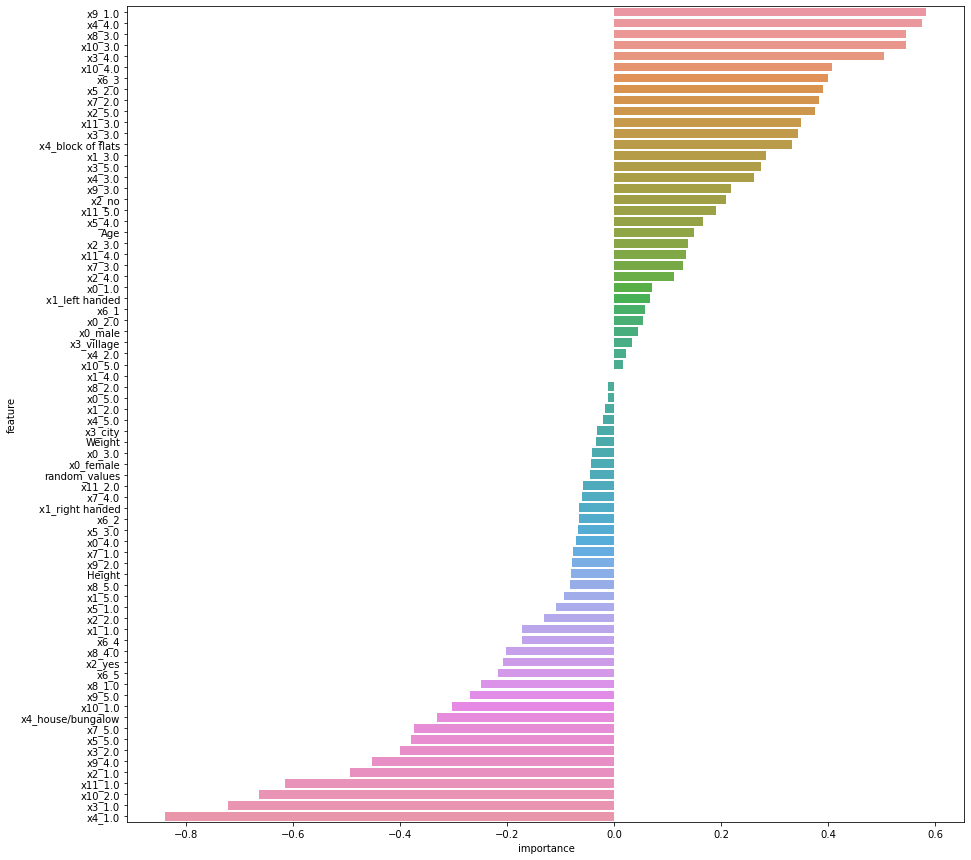

In [876]:
plt.figure(figsize=(15, 15))

featureImportance = pd.DataFrame({"feature": feature_names, 
                                  "importance": pipeline.named_steps['modelling'].coef_[2, : ]})

featureImportance.sort_values(["importance"], ascending=False, inplace=True)
sns.barplot(x=featureImportance["importance"], y=featureImportance['feature'])
plt.show()

In [ ]:
pipeline.named_steps['preprocessing']

In [ ]:
pipeline.named_steps['preprocessing'].transformers[0][1].with_mean # Scaler param

# Пример кода с генерацией признаков на другом датасете

<div class="alert alert-info">
    
* А что если есть текстовые признаки? `BagOfWords` / `TF-IDF`
* Временные ряды? `tsfresh` / `tsfel`
* Генарция новых признаков на лету - давайте реализуем


In [1]:
import pandas as pd
import numpy as np

# Пара библиотек для визуализации
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Для сериализации моделей
from joblib import Parallel, delayed
from scipy import sparse
import pickle

import seaborn as sns

from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, MinMaxScaler, FunctionTransformer
from sklearn.svm import LinearSVC
import xgboost

In [2]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head(6)

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579
5,1,3.0,2.474979e+06,0,21.0,Homemaker,1.001654e+07,1.0,0.326801


In [4]:
data[data.index.duplicated()]

,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,3.427023e+07,1,82.0,Engineer,1.003674e+07,NaN,0.658015
1,1,2.0,1.875350e+08,1,32.0,Doctor,1.014051e+07,0.0,0.311788
2,1,6.0,2.147887e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.618601
3,0,1.0,1.935075e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.566602
4,1,9.0,1.041722e+08,1,99.0,Artist,1.021908e+07,NaN,0.744413
...,...,...,...,...,...,...,...,...,...
495,1,0.0,3.589436e+07,1,3.0,Executive,1.007038e+07,1.0,0.599222
496,1,3.0,2.454208e+06,0,20.0,Homemaker,1.009348e+07,1.0,0.259710
497,1,0.0,3.335405e+06,0,17.0,Healthcare,1.016696e+07,0.0,0.258779


In [5]:
data = data[~data.index.duplicated()]

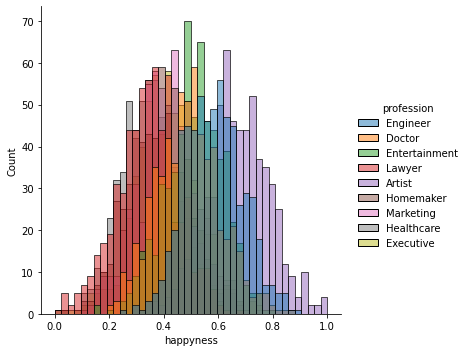

In [6]:
sub_data = data[data['home_cost'] < 10.5**7]

sns.displot(sub_data,  x = 'happyness',  hue = 'profession');

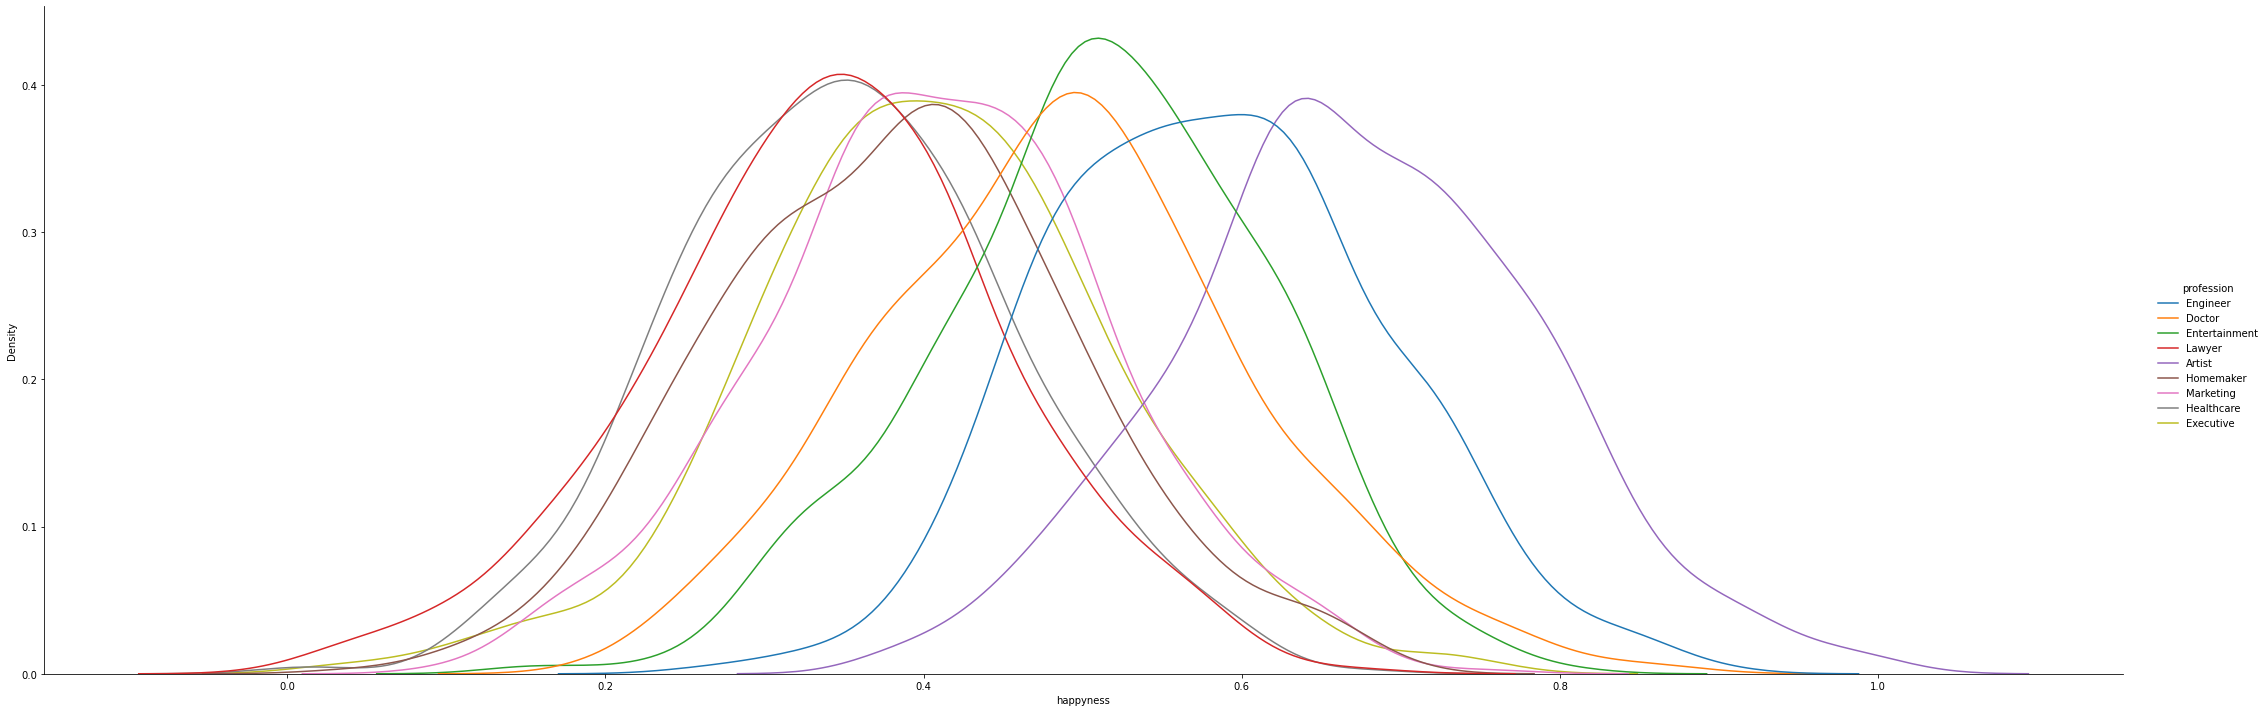

In [7]:
sub_data = data[data['home_cost'] < 10.5**7]

sns.displot(sub_data,  x = 'happyness',  hue = 'profession', kind ='kde', height =10, aspect = 3);

<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой уже знакомую нам информацию про жителей некоторого города - Атлантас.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

In [8]:
numerical_features = ['was_married', 'children', 'salary', 'sex', 'age', 'home_cost']
categorical_features = [] # ['profession']

target = 'happyness'


all_features = numerical_features + categorical_features

In [9]:
#   Для категориальных - применяем SimpleImputer, а затем StandardScaler
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    ("fs", SelectKBest(score_func=f_classif, k="all")),
])

#   Для категориальных - применяем SimpleImputer, а затем OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer()),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

# Собираем воедино трансформеры для числовых и категориальных признаков
data_transformer = ColumnTransformer(transformers=[
    ("numerical", numerical_transformer, numerical_features),
    #("categorical", categorical_transformer, categorical_features),
])

# Создание конвейера препроцессора, который сначала преобразует данные
preprocessor = Pipeline(steps=[("data_transformer", data_transformer)])

classifier_pipline = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("classifier", LogisticRegression())])

classifier_pipline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer()),
                                                                                   ('scaler',
                                                                                    StandardScaler()),
                                                                                   ('fs',
                                                                                    SelectKBest(k='all'))]),
                                                                   ['was_married',
                                                                    'children',
                                                                    'salary',

In [10]:
classifier_pipline.fit(data[all_features], data[target])

ValueError: Unknown label type: 'continuous'

In [943]:
data[all_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   was_married  6000 non-null   int64  
 1   children     6000 non-null   float64
 2   salary       6000 non-null   float64
 3   sex          6000 non-null   int64  
 4   age          6000 non-null   float64
 5   home_cost    6000 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 328.1 KB


# Как сохранить всю эту махину?

In [216]:
# И другие, но вы про них уже знаете
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Для сериализации моделей
from joblib import Parallel, delayed
from scipy import sparse
import pickle

# Save the pipeline

In [ ]:
with open("pipeline.pkl", "wb") as f:
    pickle.dump(search.best_estimator_, f)

# Load and predict

In [ ]:
with open("pipeline.pkl", 'rb') as f:
    pipeline_from_saved = pickle.load(f)

In [ ]:
pipeline_from_saved

In [ ]:
data_test.iloc[0]

In [ ]:
pipeline_from_saved.named_steps['preprocessing'].transform(data_test.iloc[:1])

In [ ]:
preds = pipeline_from_saved.predict(data_test)
print(classification_report(data_test[target], preds))

# Дополнительно

* Код/ноутбуки будут тут: https://github.com/a-milenkin/Otus_Open_Day

Пример хорошего ML проекта: https://github.com/a-milenkin/ml_project_example

**Но можно писать еще лучше!**

Задача: переписать модуль train_pipline используя Pipeline из Sklearn